In [1]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [2]:
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
training_images.shape

(60000, 28, 28)

LABEL: 2

IMAGE PIXEL ARRAY:

[[  0   0   0   0   0   1   1   0   0   0   0  63  28   0   0   0  33  85   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   2   0   0  28 126 241 255 255 255 255 255 255 252 248 111   0   0   0   2   0   0   0   0]
 [  0   0   0   0   2   0   0 206 244 251 241 230 238 221 205 230 240 230 239 251 233 165   0   0   2   0   0   0]
 [  0   0   0   1   0   0 199 251 228 234 233 236 235 245 247 237 234 239 230 230 235 255 176   0   0   1   0   0]
 [  0   0   0   0   0  81 254 226 228 239 237 236 234 232 233 235 235 236 239 237 233 225 246  73   0   0   0   0]
 [  0   0   3   0   0 255 235 239 223 234 238 236 237 236 235 235 235 235 236 235 234 230 231 255  24   0   4   0]
 [  0   0   0   0 177 239 223 254 223 232 234 234 236 236 235 235 235 235 235 234 231 233 222 246  88   0   1   0]
 [  0   0   0   0 234 239 229 255 220 232 233 232 234 235 235 235 235 235 234 233 232 230 228 254 140   0   0   0]
 [  0   0   0   0 225 240 226 255 221 227 232 228 

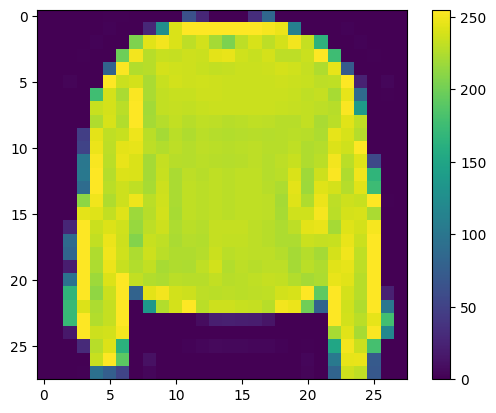

In [4]:
# You can put between 0 to 59999 here
index = 7

# Set number of characters per row when printing
np.set_printoptions(linewidth=200)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n\n{training_images[index]}\n\n')

# Visualize the image using the default colormap (viridis)
plt.imshow(training_images[index])
plt.colorbar()
plt.show()

In [5]:
# Normalize the pixel values of the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [6]:
# implementing the callbacks here
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    if(logs['loss'] < 0.4 and logs['accuracy'] > .995): # Changed to 0.4 as loss is less than 1
      print("loss is below 0.4 so cancelling training")
      self.model.stop_training = True # Corrected stop_training

callbacks = myCallback()

In [7]:
# Build the classification model
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [10]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9124 - loss: 0.2366
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9151 - loss: 0.2232
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9190 - loss: 0.2183
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9211 - loss: 0.2092
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9235 - loss: 0.2046
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9245 - loss: 0.2002
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9277 - loss: 0.1933
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9300 - loss: 0.1872
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9293 - loss: 0.1866
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9335 - loss: 0.1766


In [11]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8769 - loss: 0.3782


[0.3683253228664398, 0.8776000142097473]

In [12]:
classification = model.predict(test_images)
all_probibilities_classes = classification[5]

max_class = np.argmax(all_probibilities_classes)
max_probibility_class = np.max(max_class)


print(f'the image predicted class is: {max_probibility_class} for this image {classification[5]}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
the image predicted class is: 1 for this image [2.70089018e-08 9.99999940e-01 6.49829635e-11 2.47672521e-10 1.23599221e-11 1.31065645e-20 1.10920446e-08 1.71891588e-24 8.25375331e-15 3.92406521e-19]


In [13]:
test_images.shape
print(np.max(classification[5]))

0.99999994
